In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
missing_percent = df.isnull().mean() * 100

In [4]:
missing_percent = missing_percent.sort_values(ascending=False)

In [5]:
print("Percentage of Missing Data per Column:",missing_percent)

Percentage of Missing Data per Column: RowNumber             0.0
CustomerId            0.0
Card Type             0.0
Satisfaction Score    0.0
Complain              0.0
Exited                0.0
EstimatedSalary       0.0
IsActiveMember        0.0
HasCrCard             0.0
NumOfProducts         0.0
Balance               0.0
Tenure                0.0
Age                   0.0
Gender                0.0
Geography             0.0
CreditScore           0.0
Surname               0.0
Point Earned          0.0
dtype: float64


In [6]:
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")

The dataset has 10000 rows and 18 columns.


In [7]:
churn_counts = df['Exited'].value_counts()
print("Churn Distribution:", churn_counts)

Churn Distribution: Exited
0    7962
1    2038
Name: count, dtype: int64


In [8]:
churn_percentage = df['Exited'].value_counts(normalize=True) * 100
print("\nChurn Distribution (in %):")
print(churn_percentage)


Churn Distribution (in %):
Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


In [9]:
salary_distribution = df.groupby('Exited')['EstimatedSalary'].describe()
print(salary_distribution)

         count           mean           std    min        25%         50%  \
Exited                                                                      
0       7962.0   99726.853141  57399.956717  90.07  50783.295   99620.355   
1       2038.0  101509.908783  57932.623392  11.58  51924.020  102489.335   

                75%        max  
Exited                          
0       148602.4450  199992.48  
1       152443.8575  199808.10  


In [10]:
Churn_Gender = df.groupby('Gender')['Exited'].mean() * 100
print("Churn Rate by Gender (%):",Churn_Gender)

Churn Rate by Gender (%): Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


In [11]:
churn_by_geo = df.groupby('Geography')['Exited'].mean() * 100
print("\nChurn Rate by Geography (%):",churn_by_geo)


Churn Rate by Geography (%): Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


In [12]:
churn_by_active = df.groupby('IsActiveMember')['Exited'].mean() * 100
print("\nChurn Rate by IsActiveMember (%):",churn_by_active)


Churn Rate by IsActiveMember (%): IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


In [13]:
avg_values = df.groupby('Exited')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().round(2)
print("Average CreditScore, Balance, and EstimatedSalary by Churn Status:\n",avg_values)

Average CreditScore, Balance, and EstimatedSalary by Churn Status:
         CreditScore   Balance  EstimatedSalary
Exited                                        
0            651.84  72742.75         99726.85
1            645.41  91109.48        101509.91


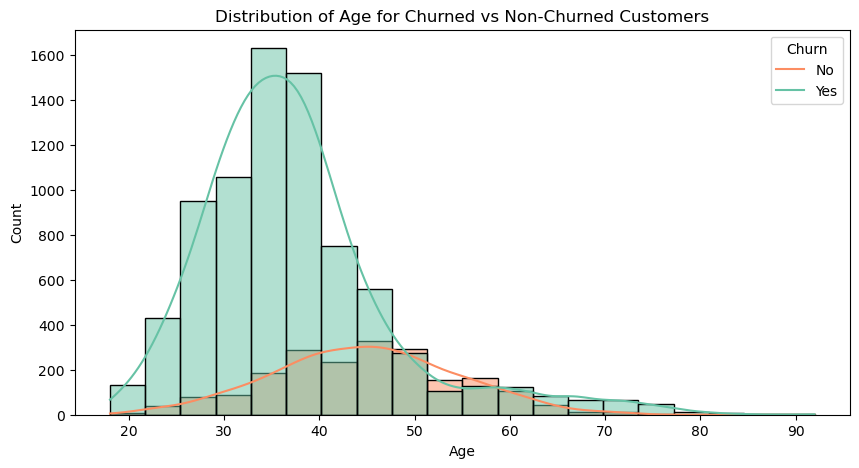

In [15]:
# Histogram 
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=20, palette='Set2')
plt.title("Distribution of Age for Churned vs Non-Churned Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

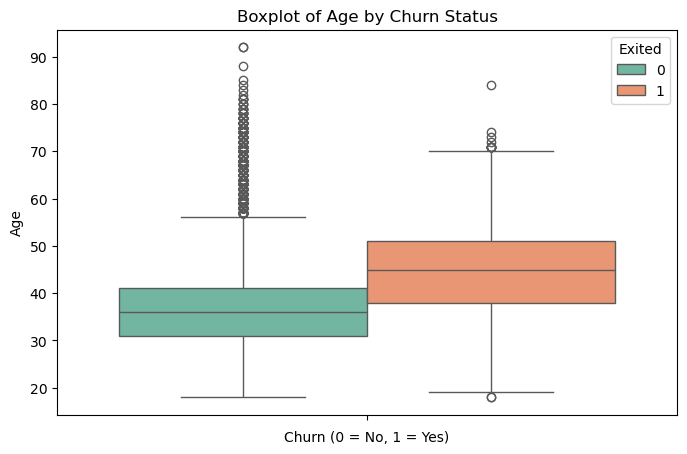

In [17]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, hue='Exited', y='Age', palette='Set2')
plt.title("Boxplot of Age by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

In [18]:
numeric_features = ['CreditScore', 'Balance', 'EstimatedSalary']

correlation = df[numeric_features].corr()

print("Correlation among numeric features:\n")
print(correlation)

Correlation among numeric features:

                 CreditScore   Balance  EstimatedSalary
CreditScore         1.000000  0.006268        -0.001384
Balance             0.006268  1.000000         0.012797
EstimatedSalary    -0.001384  0.012797         1.000000


Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64


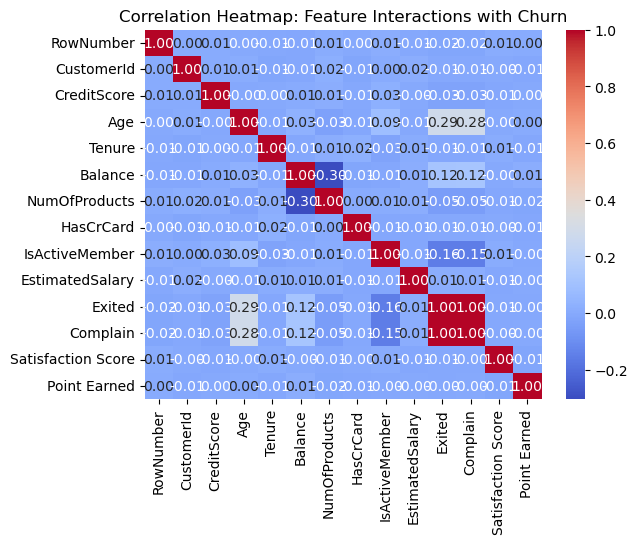

In [19]:
corr = df.corr(numeric_only=True)

print(corr['Exited'].sort_values(ascending=False))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Feature Interactions with Churn")
plt.show()

In [20]:
bins = [18, 30, 50, 100]
labels = ['Adults (18-30)', 'Middle Age (31-50)', 'Seniors (51-100)']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [21]:
churn_by_age_group = (
    df.groupby('AgeGroup')['Exited']
    .mean()
    .reset_index()
    .rename(columns={'Exited': 'ChurnRate'})
)

print(churn_by_age_group)

             AgeGroup  ChurnRate
0      Adults (18-30)   0.075203
1  Middle Age (31-50)   0.195983
2    Seniors (51-100)   0.446471


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15184\2615047502.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Exited']


In [22]:
df['ProductGroup'] = df['NumOfProducts'].apply(lambda x: 'Single Product' if x == 1 else 'Multiple Products')

churn_by_product = (
    df.groupby('ProductGroup')['Exited']
    .mean()
    .reset_index()
    .rename(columns={'Exited': 'ChurnRate'})
)

print(churn_by_product)

        ProductGroup  ChurnRate
0  Multiple Products   0.127950
1     Single Product   0.277144
